# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [5]:
df_flights.shape

(271940, 20)

In [4]:
#Shape of the data
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [7]:
#Identify missing values/null
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [6]:
#drop rows with missing values 
df_flights = df_flights.dropna(axis=0, how= 'any')

In [15]:
#Identify outliers
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
#Use pandas describe() to find outliers in DepDelay & ArrDelay columns
df_flights.describe()[['DepDelay','ArrDelay']]

,DepDelay,ArrDelay
count,269179.000000,269179.000000
mean,10.456614,6.563287
std,35.840715,38.420207
min,-63.000000,-75.000000
25%,-4.000000,-11.000000
50%,-1.000000,-3.000000
75%,9.000000,10.000000
max,1425.000000,1440.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_15860\2560564349.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



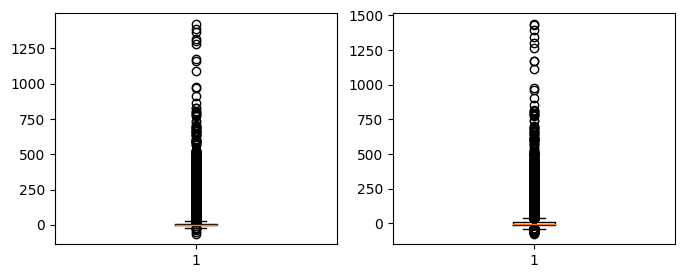

In [25]:
#Create a box plot
fig, ax =plt.subplots(1,2,figsize=(8,3))

ax[0].boxplot(df_flights[['DepDelay']])
ax[1].boxplot(df_flights[['ArrDelay']])
fig.show()

In [26]:
#Trim outliers based on the 1&90% percentiles
ArrDelay1pcnt = df_flights.ArrDelay.quantile(0.01)
ArrDelay90pcnt = df_flights.ArrDelay.quantile(0.90)
DepDelay1pcnt = df_flights.DepDelay.quantile(0.01)
DepDelay90pcnt = df_flights.DepDelay.quantile(0.90)

#Trim
df_flights = df_flights[df_flights.ArrDelay < ArrDelay90pcnt]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay1pcnt]
df_flights = df_flights[df_flights.DepDelay < DepDelay90pcnt]
df_flights = df_flights[df_flights.DepDelay > DepDelay1pcnt]

C:\Users\HP\AppData\Local\Temp\ipykernel_15860\3824305622.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



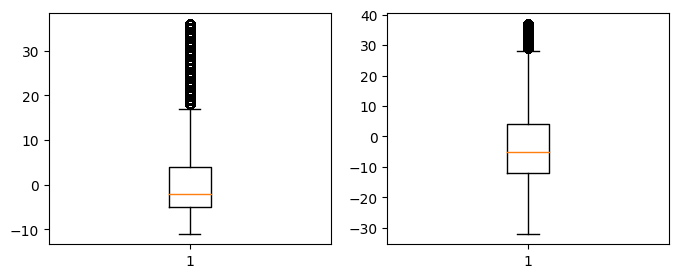

In [27]:
#Revised distribution
fig, ax =plt.subplots(1,2,figsize=(8,3))

ax[0].boxplot(df_flights[['DepDelay']])
ax[1].boxplot(df_flights[['ArrDelay']])
fig.show()

In [32]:
#What are the average (mean) departure and arrival delays?
print('DepDelay:{:.2f}\nArrDelay:{:.2f}\n'.format(df_flights['DepDelay'].mean(),df_flights['ArrDelay'].mean()))
#df_flights[delayFields].mean

DepDelay:1.30
ArrDelay:-3.14



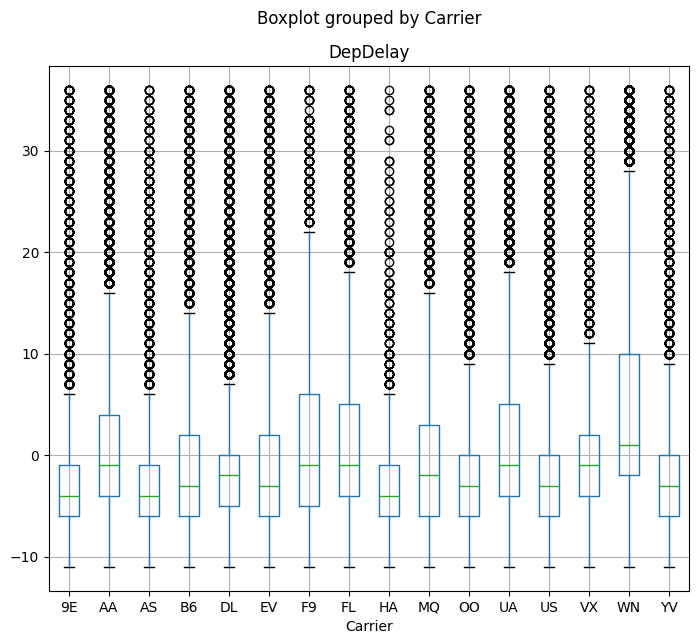

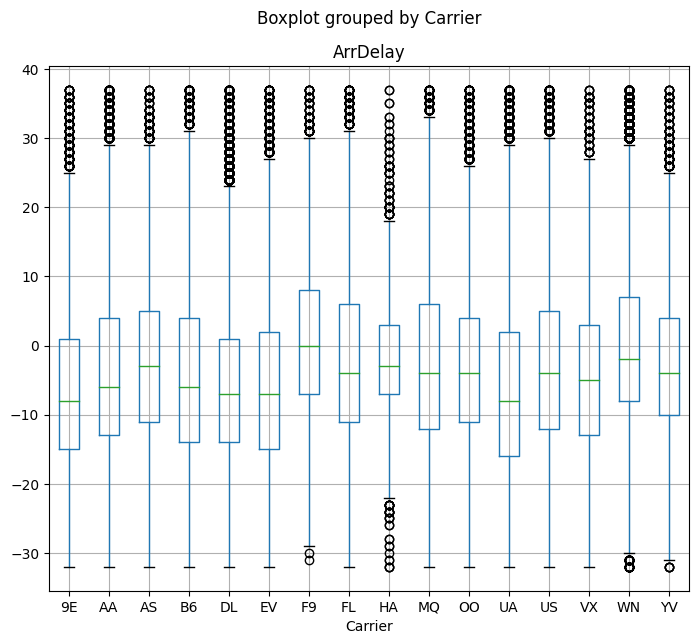

In [34]:
#How do the carriers compare in terms of arrival delay performance?
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    df_flights.boxplot(column= col, by= 'Carrier', figsize= (8,7))

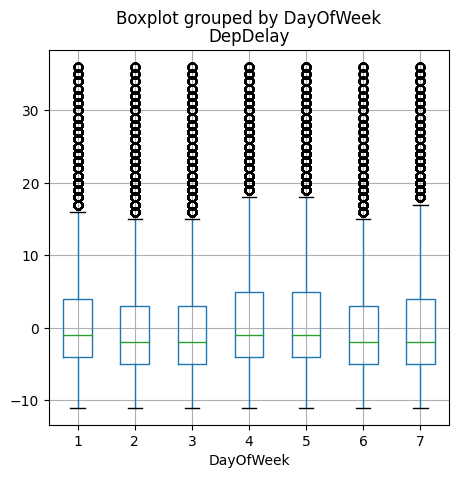

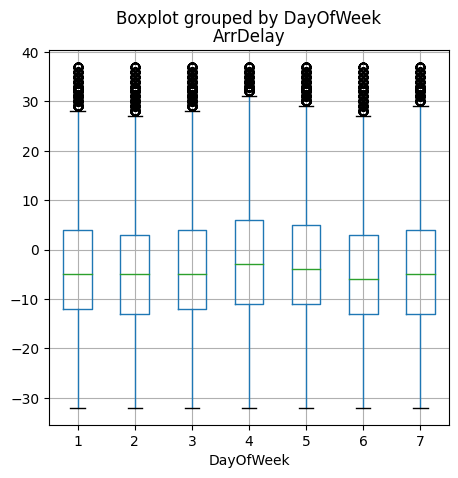

In [38]:
#Is there a noticable difference in arrival delays for different days of the week?
for col in delayFields:
    df_flights.boxplot(column= col, by= 'DayOfWeek' , figsize = (5,5))

,DepDelay
OriginAirportName,
Chicago Midway International,6.276483
William P Hobby,5.001977
Dallas Love Field,4.978905
Baltimore/Washington International Thurgood Marshall,3.840197
Denver International,3.706629
...,...
Tucson International,-1.379239
Richmond International,-1.642562
Kahului Airport,-1.867446


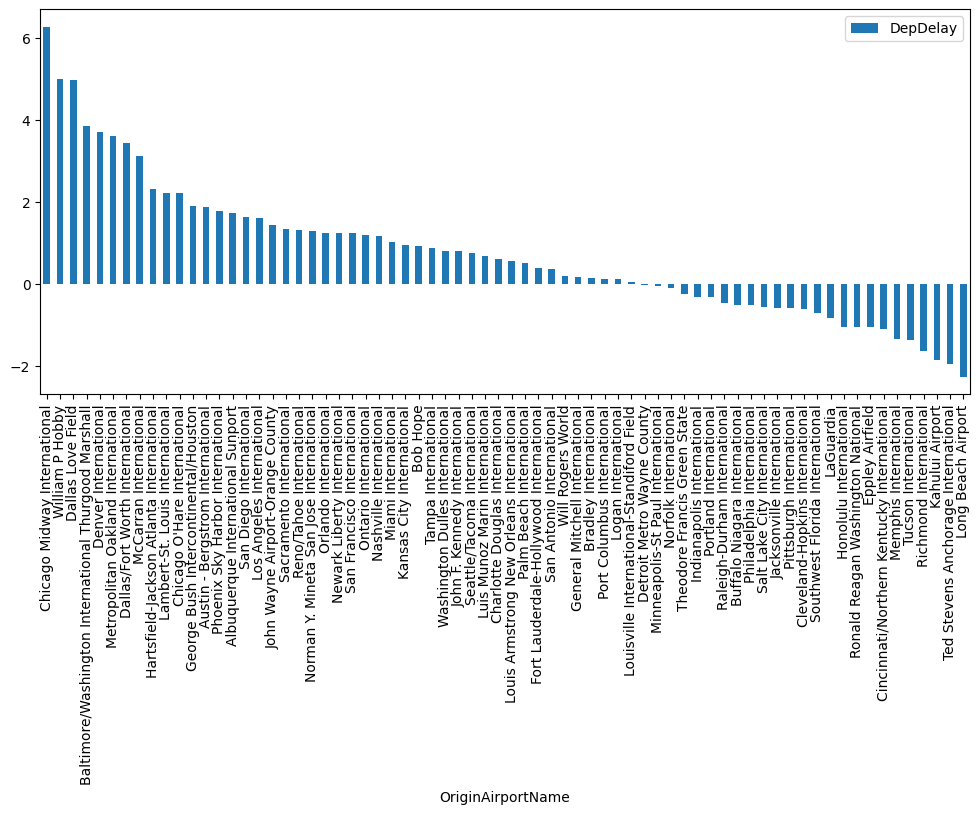

In [46]:
#Which departure airport has the highest average departure delay
AirportDep = df_flights.groupby(df_flights.OriginAirportName)

MeanDep = pd.DataFrame(AirportDep['DepDelay'].mean()).sort_values('DepDelay',ascending= False)
#Plot bar graph
MeanDep.plot(kind= 'bar', figsize= (12,5))

MeanDep

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

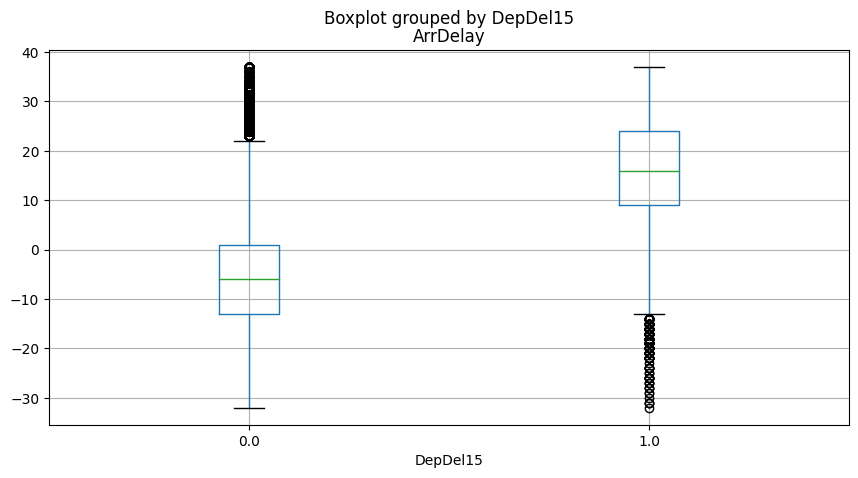

In [49]:
#Do late* departures tend to result in longer arrival delays than on-time departures?*
df_flights.boxplot(column= 'ArrDelay', by= 'DepDel15', figsize= (10,5))

In [50]:
#Which route (from origin airport to destination airport) has the most late* arrivals?*
# Add a routes column
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

# Group by routes
route_group = df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International > Los Angeles International,102
Los Angeles International > San Francisco International,90
McCarran International > Los Angeles International,80
LaGuardia > Hartsfield-Jackson Atlanta International,74
Los Angeles International > McCarran International,72
...,...
Southwest Florida International > Cleveland-Hopkins International,0
Southwest Florida International > Denver International,0
Louisville International-Standiford Field > Philadelphia International,0


In [51]:
#Which route has the highest average arrival delay?
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,25.333333
Cleveland-Hopkins International > Palm Beach International,18.000000
Denver International > Raleigh-Durham International,14.720000
Charlotte Douglas International > General Mitchell International,13.500000
Cleveland-Hopkins International > Philadelphia International,12.800000
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Jacksonville International > Chicago Midway International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
